In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
flower= pd.read_csv("iris-flower-dataset.csv")
flower

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
 flower['species'].value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [4]:
flower.shape

(150, 5)

In [5]:
flower.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
flower.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<Axes: >

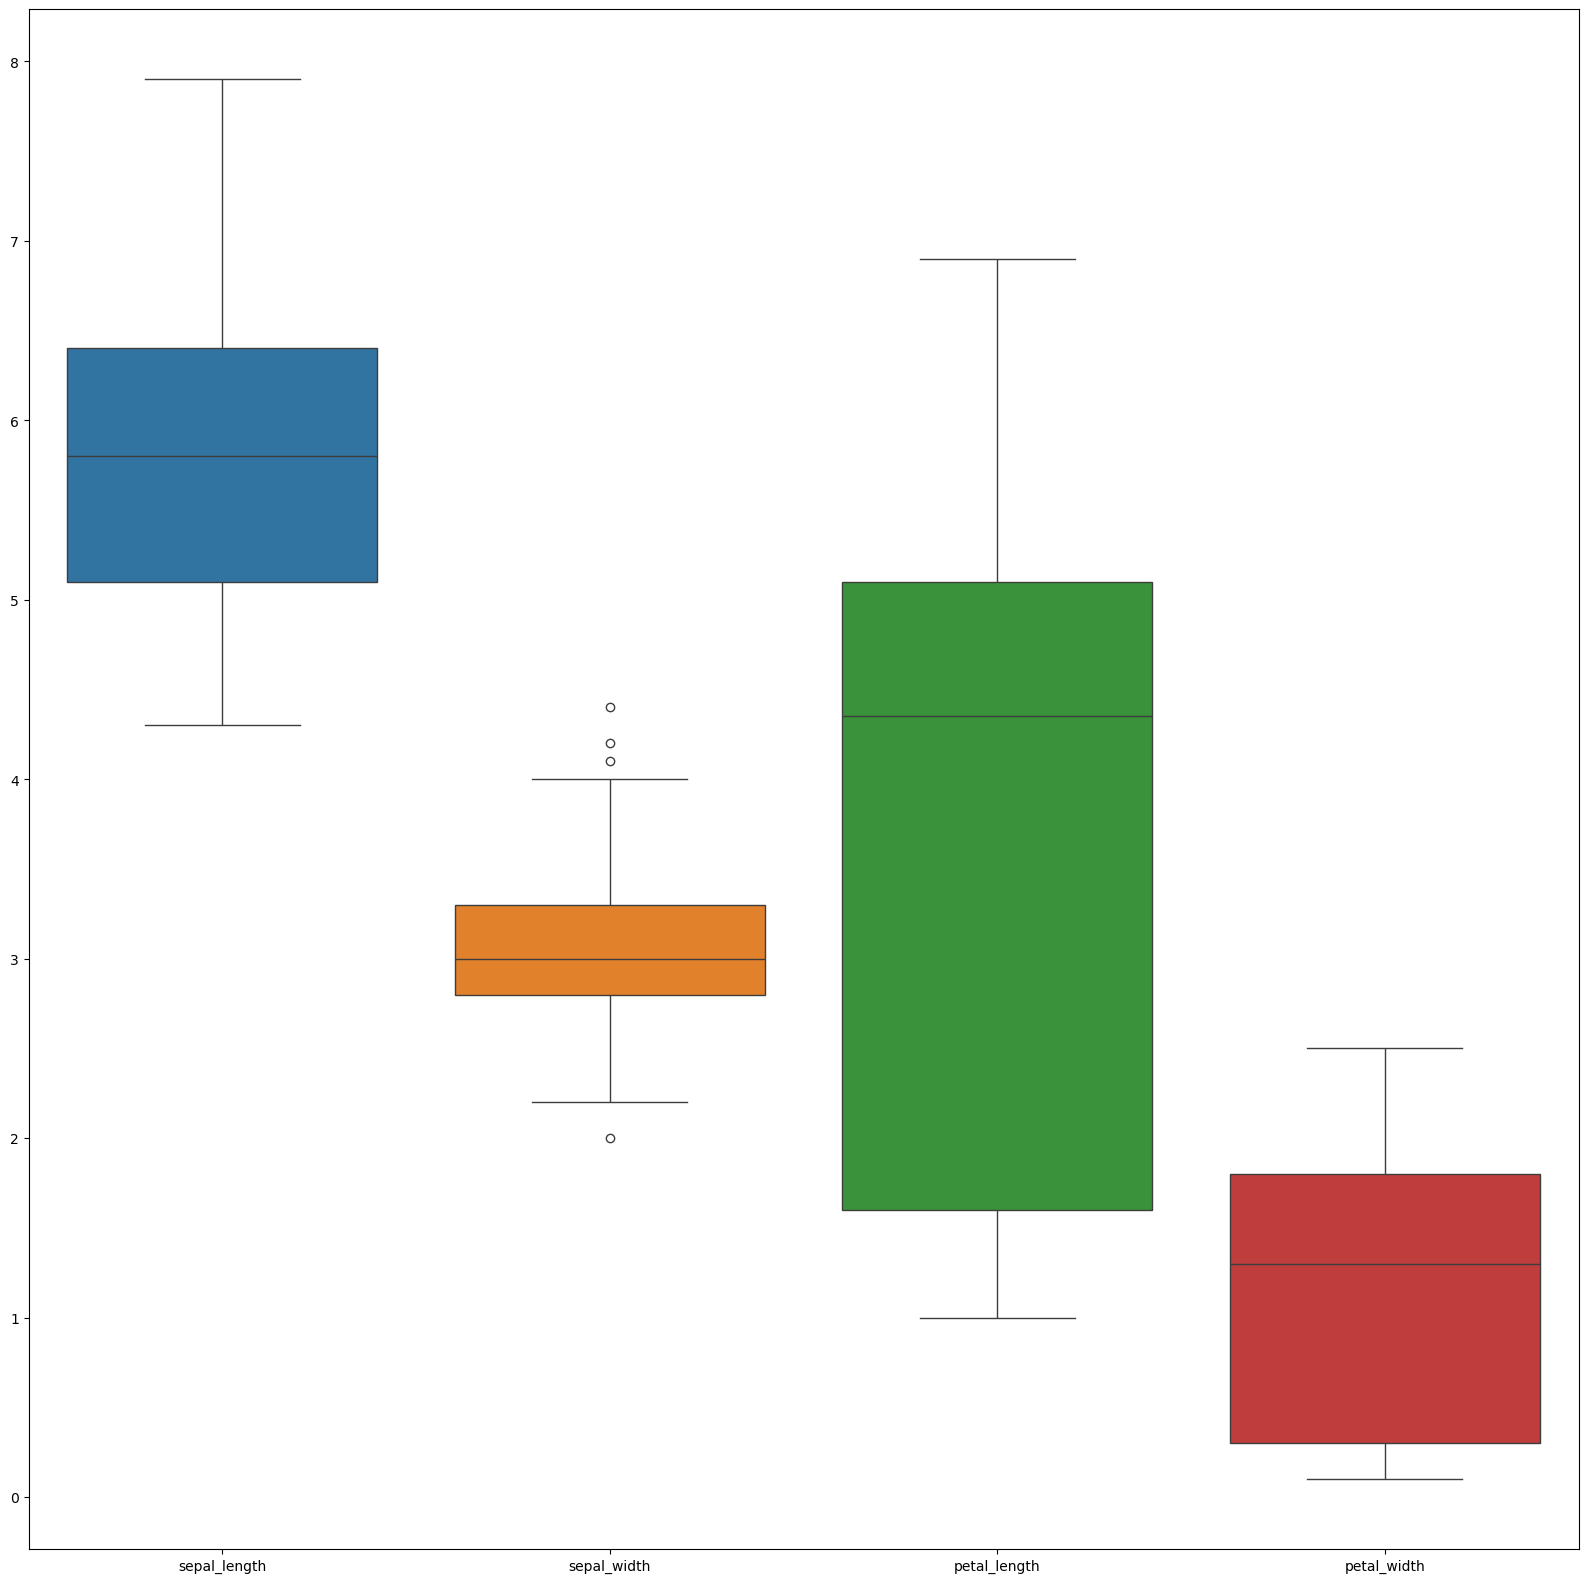

In [7]:
fig,ax=plt.subplots(figsize=(20,20))
sns.boxplot(data=flower,ax=ax)

In [8]:
flower.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_33064\2413929250.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  flower.replace({'species':{'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}},inplace=True)


In [9]:
flower

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [10]:
correlation= flower.corr()
correlation

,sepal_length,sepal_width,petal_length,petal_width,species
sepal_length,1.000000,-0.109369,0.871754,0.817954,0.782561
sepal_width,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
petal_length,0.871754,-0.420516,1.000000,0.962757,0.949043
petal_width,0.817954,-0.356544,0.962757,1.000000,0.956464
species,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

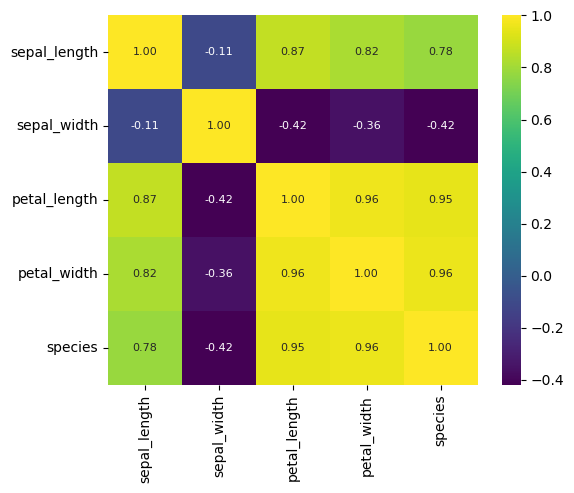

In [11]:
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':8}, cmap = 'viridis')

In [27]:
x= flower.drop('species', axis=1)
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [29]:
y = flower['species']
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [31]:
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size= 0.2, random_state= 2)

In [33]:
x.shape, x_train.shape, x_test.shape, y.shape, y_train.shape, y_test.shape

((150, 4), (120, 4), (30, 4), (150,), (120,), (30,))

In [37]:
model = RandomForestClassifier()

In [39]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [41]:
training_data_predict = model.predict(x_train)
training_data_accuracy = accuracy_score(training_data_predict, y_train)
print('accuracy of trained data:', training_data_accuracy)

accuracy of trained data: 1.0


In [43]:
testing_data_predict = model.predict(x_test)
testing_data_accuracy = accuracy_score(testing_data_predict, y_test)
print('accuracy of testing data:', testing_data_accuracy)

accuracy of testing data: 0.9666666666666667


In [47]:
cm = confusion_matrix(testing_data_predict, y_test)
cm

array([[14,  0,  0],
       [ 0,  7,  0],
       [ 0,  1,  8]], dtype=int64)

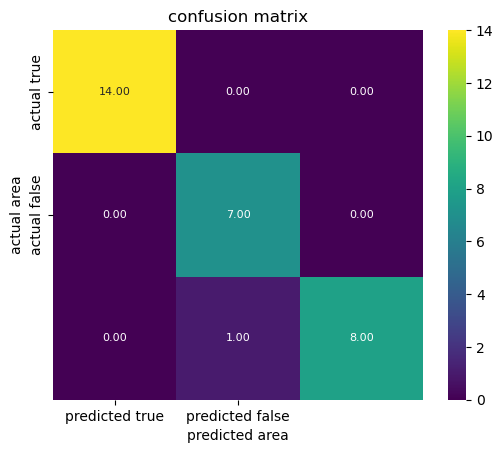

In [49]:
sns.heatmap(cm, cbar = True, square=True, annot= True, fmt = '.2f', annot_kws={'size':8}, cmap= 'viridis',
            xticklabels=['predicted true', 'predicted false'],
            yticklabels=['actual true', 'actual false'])
plt.xlabel('predicted area')
plt.ylabel('actual area')
plt.title('confusion matrix')
plt.show()
    

In [51]:
print(classification_report(testing_data_predict,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.88      1.00      0.93         7
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [59]:
new_data= (5.1,	3.5,1.4,0.2)
new_data_as_np= np.asarray(new_data)
new_data_reshaped=new_data_as_np.reshape(1,-1)
prediction = model.predict(new_data_reshaped)
if prediction[0]==0:
    print('0')
elif prediction[0]==1:
    print('1')
else:
    print('2')


0


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [61]:
flower.head(100)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
95,5.7,3.0,4.2,1.2,1
96,5.7,2.9,4.2,1.3,1
97,6.2,2.9,4.3,1.3,1
98,5.1,2.5,3.0,1.1,1


In [63]:
new_data= (5.7,	2.8,	4.1,	1.3)
new_data_as_np = np.asarray(new_data)
new_data_reshaped=new_data_as_np.reshape(1,-1)
prediction= model.predict(new_data_reshaped)
if prediction[0]==0:
    print('0')
elif prediction[0]==1:
    print('1')
else:
    print('2')

1


C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
